<a href="https://www.kaggle.com/code/rajatraj0502/automobile-fuel-efficiency-analysis-and-prediction?scriptVersionId=138394617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobiles-project-dataset/Automobile.csv


In [2]:
import pandas as pd

# Load the CSV file
data_path = os.path.join("/kaggle/input/automobiles-project-dataset/Automobile.csv")
df = pd.read_csv(data_path)

# Show the first few rows of the dataframe
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
# Check for missing values in the dataset
df.isnull().sum()


name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

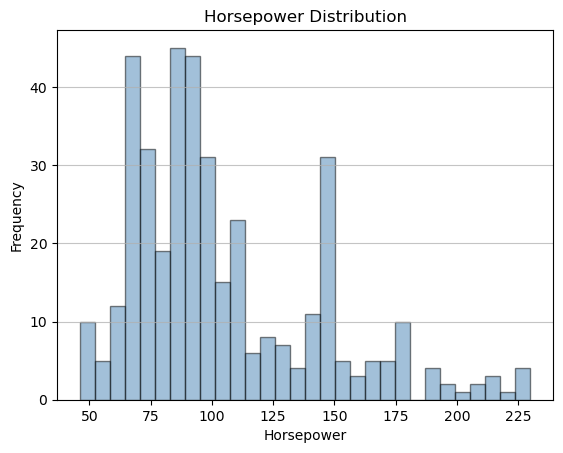

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of 'horsepower' column to examine its distribution
plt.hist(df['horsepower'].dropna(), bins=30, alpha=0.5, color='steelblue', edgecolor='black')
plt.title('Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [5]:
# Calculate the median of the 'horsepower' column
horsepower_median = df['horsepower'].median()

# Impute missing values with the median
df['horsepower'].fillna(horsepower_median, inplace=True)

# Check for missing values in the dataset again
df.isnull().sum()


name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [6]:
# Generate statistical summary of the numerical columns in the dataset
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


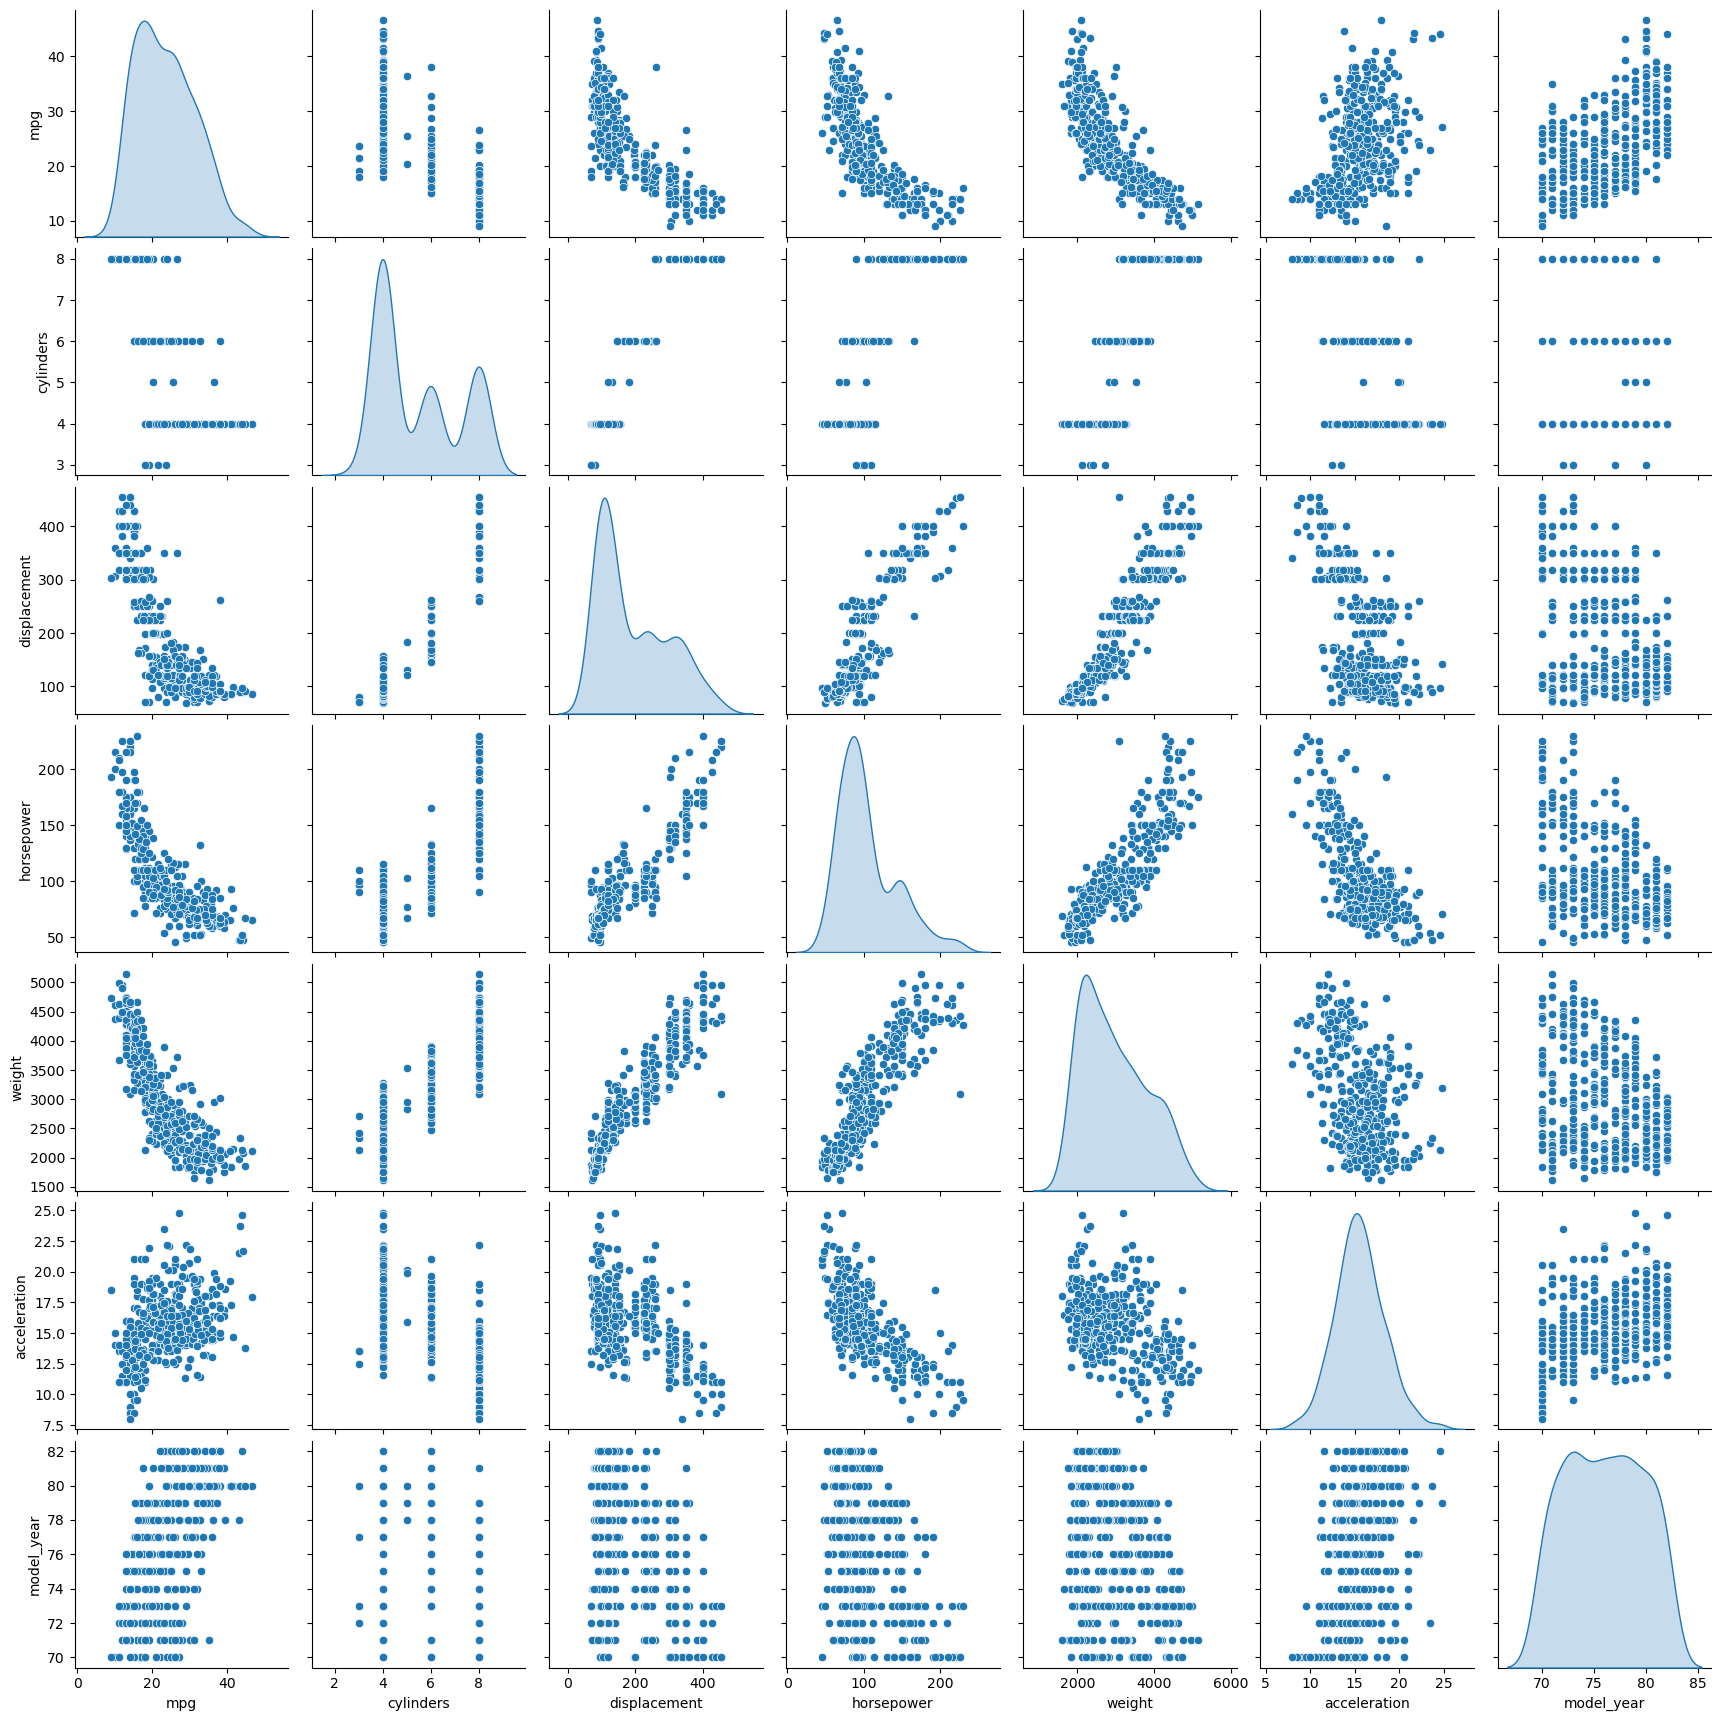

In [7]:
import seaborn as sns

# Plot pairplot to visualize pairwise relationships and distributions
sns.pairplot(df, diag_kind='kde')
plt.show()


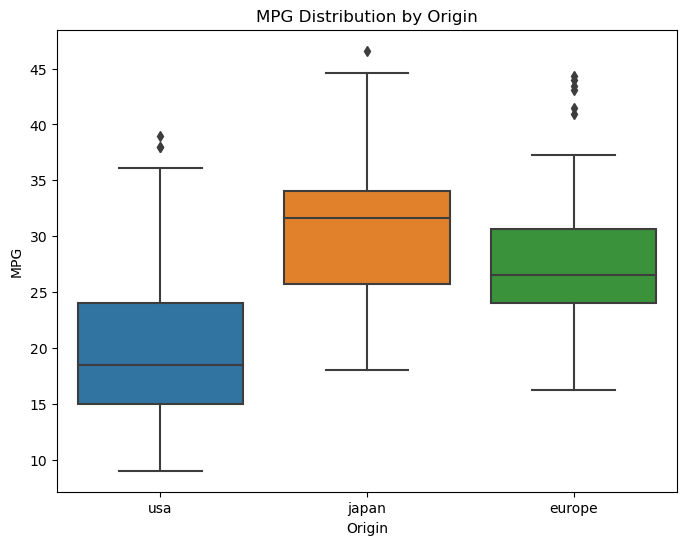

In [8]:
# Create boxplots of 'mpg' for each category of 'origin'
plt.figure(figsize=(8, 6))
sns.boxplot(x="origin", y="mpg", data=df)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


/tmp/ipykernel_20/3685477142.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


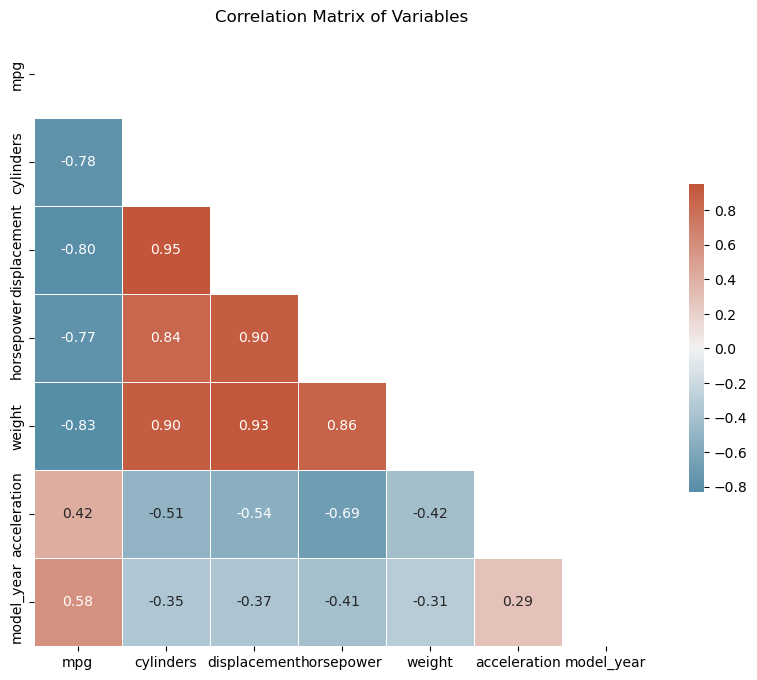

In [9]:
import numpy as np

# Compute the correlation matrix again
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Variables')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'origin' column
df_encoded = pd.get_dummies(df, columns=['origin'])

# Define the predictors and target
X = df_encoded.drop(columns=['name', 'mpg'])
y = df_encoded['mpg']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(8.338657478621633, 0.844909633276208)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf = rf_model.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(4.542255674999999, 0.9155187630388889)

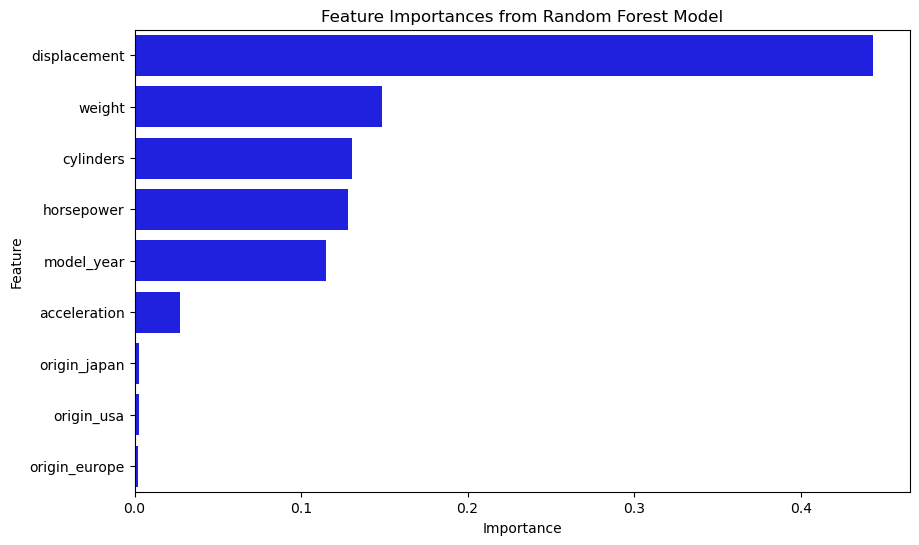

In [12]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance score
importances_df = importances_df.sort_values('importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances_df, color='b')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search with a Random Forest model
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


({'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.845649097799208)

In [14]:
# Initialize and fit the Random Forest model with the best hyperparameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf_best = rf_model_best.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

mse_rf_best, r2_rf_best


(3.967187462525569, 0.9262144343975592)

In [15]:
# Define the new data instance
new_data = pd.DataFrame({
    'cylinders': [6],
    'displacement': [225],
    'horsepower': [100],
    'weight': [3233],
    'acceleration': [15.4],
    'model_year': [76],
    'origin_europe': [0],
    'origin_japan': [0],
    'origin_usa': [1]
})

# Use the optimized Random Forest model to predict the mpg for the new data instance
mpg_pred = rf_model_best.predict(new_data)

mpg_pred[0]


21.532464285714276